# Homework 2

### Part 1 A/B Hypothesis testing

Considering the following success ad proportions:
* $P_A$ = 500 / 1000
* $P_B$ = 550 / 1000

The null hypothesis would be that there is no difference in the proportions of success:

$H_0$: $P_A$ and $P_B$ are equivalent

In [271]:
import numpy as np
from scipy.stats import norm
from typing import Tuple


def compute_z_stat_prob(nA: int, NA: int, nB: int, NB: int) -> Tuple[float, float]:
    pA = nA / NA
    pB = nB / NB
    p_hat = NA * pA / (NA + NB) + NB * pB / (NA + NB)
    q_hat = 1 - p_hat
    z = (pA - pB) / np.sqrt(p_hat * q_hat * (1 / NA + 1 / NB))
    return z, 1 - norm.cdf(z)


# A logo
nA = 500
NA = 1000
# B logo
nB = 100
NB = 1000


z, p_value = compute_z_stat_prob(nA, NA, nB, NB)
print(f"Z value: {z} | p value: {p_value}")
print(f"p_value <= 0.05: {p_value <= 0.05}")
print(f"p_value <= 0.01: {p_value <= 0.01}")

Z value: 19.518001458970662 | p value: 0.0
p_value <= 0.05: True
p_value <= 0.01: True


Since the calculated p_value is less than both significance levels, we can reject the null hypothesis and state that the images did perform differently. Meaning the higher click rate with logo B is significant and logo B is better if the goal is to increase click rate.

### Part 2: Regression of real estate data

#### Task 1: Import the data


In [238]:
import pandas as pd

files = ["realEstate1.csv", "realEstate2.csv"]
df = pd.concat([pd.read_csv("data/" + file) for file in files])
print(df.shape)
for col in df.columns:
    print(col)

(348, 206)
ListNo
Access
AdditInfo
Acres
ListAgt
AirType
Amenities
Area
BackDim
Basemnt
BsmntFin
City
ListCoAgt
CompBac
CompDays
CompSac
ContPh1
ContPh2
Contact
ContractDt
County
CrprtCap
DVR
DaysOnMkt
Deck
DirPre
DirPost
EWCoord
EntrdBy
EntryDt
Excl
ExpDtDisp
Ext
FeatExt
FeatInt
Floor
Frontage
GaragCap
Garage
HOAFee
HOATerms
Heat
HouseNbr
Image
Incl
Irregular
LandScape
Latitude
ListDt
ListType
Longitude
Lot
LstPrice
NSCoord
NumDish
NumDispose
NumOvRng
NumRefg
OffMktDt
ListOff
OpenHseDt
Owner
P1Bed
P1BthFull
P1BthHalf
P1BthTq
P1Fire
P1Rent
P1Sqf
P1FamDen
P1Kitch
P1Bar
P1Formal
P1SemiForm
P1Laundry
P2Bed
P2BthFull
P2BthHalf
P2BthTq
P2Fire
P2Rent
P2Sqf
P2FamDen
P2Kitch
P2Bar
P2Formal
P2SemiForm
P2Laundry
P3Bed
P3BthFull
P3BthHalf
P3BthTq
P3Fire
P3Rent
P3Sqf
P3FamDen
P3Kitch
P3Bar
P3Formal
P3SemiForm
P3Laundry
P4Bed
P4BthFull
P4BthHalf
P4BthTq
P4Fire
P4Rent
P4Sqf
P4FamDen
P4Kitch
P4Bar
P4Formal
P4SemiForm
P4Laundry
P5Bed
P5BthFull
P5BthHalf
P5BthTq
P5Fire
P5Rent
P5Sqf
P5FamDen
P5Kitch
P5B

#### Task 2: Clean the data


In [239]:
df.LstPrice.unique()
df = df[(df["LstPrice"] > 200_000) & (df["LstPrice"] < 1_000_000)]

base_cols = ['Acres',
                'Deck',
                'GaragCap',
                'Latitude',
                'Longitude',
                'LstPrice',
                'Patio',
                'PkgSpacs',
                'PropType',
                'SoldPrice',
                'Taxes',
                'TotBed',
                'TotBth',
                'TotSqf',
                'YearBlt']

additional = ['HOAFee','Basemnt']

cols_to_keep = base_cols + additional

df = df[cols_to_keep]

df['prop_type_num'] = df['PropType'].map({"Single Family": 1, "Condo": 0, "Townhouse": 0})

df['TotSqf'] = pd.to_numeric(df['TotSqf'].str.replace(',', ''), errors='coerce')

df = pd.concat([df, pd.get_dummies(df['Basemnt']).astype(int)], axis=1)

df.drop(columns=['Basemnt'], inplace=True)

df = df[df["Longitude"] != 0]

df = df[(df["Taxes"] > 1000) & (df["Taxes"] < 10_000)]

df['HOAFee'] = df["HOAFee"].fillna(0)

old_prop_type = df['PropType']

# df.drop(columns=['PropType'], inplace=True)

print(df.dtypes)

Acres                                             float64
Deck                                                int64
GaragCap                                            int64
Latitude                                          float64
Longitude                                         float64
LstPrice                                            int64
Patio                                               int64
PkgSpacs                                            int64
PropType                                           object
SoldPrice                                           int64
Taxes                                               int64
TotBed                                            float64
TotBth                                            float64
TotSqf                                              int64
YearBlt                                             int64
HOAFee                                            float64
prop_type_num                                       int64
Daylight      

#### Task 3: Exploratory data analysis


In [240]:
print("N rows: ", df.shape[0], "N cols: ", df.shape[1])
print("\n")
def describe_column(col: str, df: pd.DataFrame):
    print("Column: ", col)
    print("Num unique values: ", df[col].nunique())
    unique_values = df[col].unique()
    print("Example Values: ", [np.random.choice(unique_values) for _ in range(5)])
    print("Null count: ", df[col].isnull().sum())
    print(df[col].describe().reset_index().T)
    print("\n")

for col in df.columns:
    describe_column(col, df)

N rows:  251 N cols:  57


Column:  Acres
Num unique values:  46
Example Values:  [np.float64(0.0), np.float64(0.34), np.float64(0.03), np.float64(0.34), np.float64(0.01)]
Null count:  0
           0         1         2    3     4     5     6     7
index  count      mean       std  min   25%   50%   75%   max
Acres  251.0  0.132789  0.124628  0.0  0.05  0.11  0.16  0.69


Column:  Deck
Num unique values:  5
Example Values:  [np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(3)]
Null count:  0
           0         1         2    3    4    5    6    7
index  count      mean       std  min  25%  50%  75%  max
Deck   251.0  0.689243  0.799402  0.0  0.0  1.0  1.0  5.0


Column:  GaragCap
Num unique values:  6
Example Values:  [np.int64(0), np.int64(5), np.int64(3), np.int64(0), np.int64(5)]
Null count:  0
              0         1         2    3    4    5    6    7
index     count      mean       std  min  25%  50%  75%  max
GaragCap  251.0  1.286853  0.974365  0.0  0.5  1.0  2.0

*EDA summary of data*

There are 251 rows which corresponds to 251 listings and 56 features describing each listing.
The Basemnt column was split into dummy columns and added 40 columns individually.
The remaining 16 columns are individual features not encoded as categories.
Based on the column exploration above, all values do seem reasonable and do not contain null values.


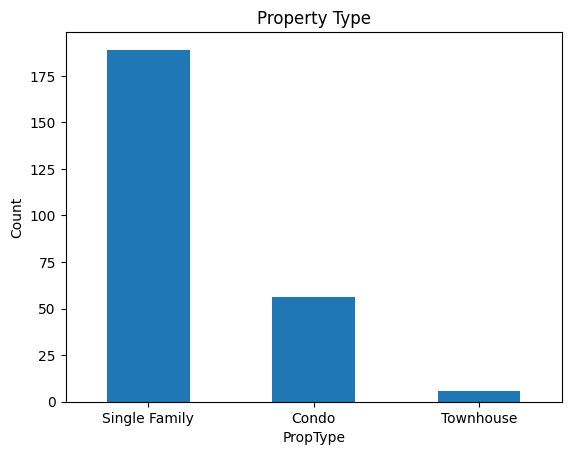

In [241]:
import matplotlib.pyplot as plt

old_prop_type.value_counts().plot(kind='bar', title='Property Type', ylabel='Count', rot=0)
plt.show()

In [242]:
# NOTE: These helper functions were taken from the matplotlib annotated heatmap tutorial https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(range(data.shape[1]), labels=col_labels,
                  rotation=-30, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

#### Correlation matrix heatmap

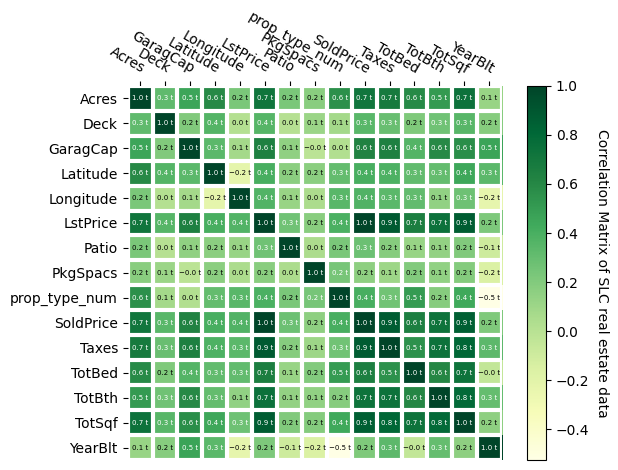

In [243]:
cols_to_visualize = ['Acres',
                'Deck',
                'GaragCap',
                'Latitude',
                'Longitude',
                'LstPrice',
                'Patio',
                'PkgSpacs',
                'prop_type_num',
                'SoldPrice',
                'Taxes',
                'TotBed',
                'TotBth',
                'TotSqf',
                'YearBlt']

corr_mat = df[cols_to_visualize].corr()

fig, ax = plt.subplots()

im, cbar = heatmap(corr_mat[cols_to_visualize], corr_mat.index, corr_mat.columns, ax=ax,
                   cmap="YlGn", cbarlabel="Correlation Matrix of SLC real estate data")
texts = annotate_heatmap(im, valfmt="{x:.1f} t", fontsize=5)

fig.tight_layout()
plt.show()

#### Correlation scatter plot

array([[<Axes: xlabel='Acres', ylabel='Acres'>,
        <Axes: xlabel='LstPrice', ylabel='Acres'>,
        <Axes: xlabel='SoldPrice', ylabel='Acres'>,
        <Axes: xlabel='Taxes', ylabel='Acres'>,
        <Axes: xlabel='TotBed', ylabel='Acres'>,
        <Axes: xlabel='TotBth', ylabel='Acres'>,
        <Axes: xlabel='TotSqf', ylabel='Acres'>,
        <Axes: xlabel='YearBlt', ylabel='Acres'>],
       [<Axes: xlabel='Acres', ylabel='LstPrice'>,
        <Axes: xlabel='LstPrice', ylabel='LstPrice'>,
        <Axes: xlabel='SoldPrice', ylabel='LstPrice'>,
        <Axes: xlabel='Taxes', ylabel='LstPrice'>,
        <Axes: xlabel='TotBed', ylabel='LstPrice'>,
        <Axes: xlabel='TotBth', ylabel='LstPrice'>,
        <Axes: xlabel='TotSqf', ylabel='LstPrice'>,
        <Axes: xlabel='YearBlt', ylabel='LstPrice'>],
       [<Axes: xlabel='Acres', ylabel='SoldPrice'>,
        <Axes: xlabel='LstPrice', ylabel='SoldPrice'>,
        <Axes: xlabel='SoldPrice', ylabel='SoldPrice'>,
        <Axes: xlab

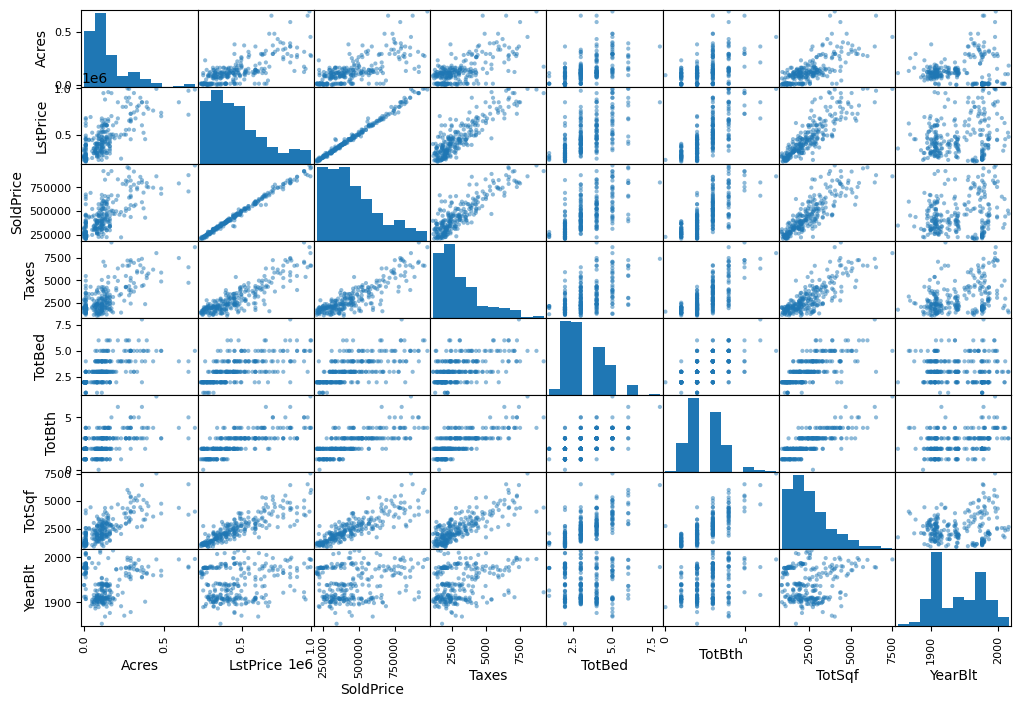

In [244]:
cols_to_plot = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

pd.plotting.scatter_matrix(df[cols_to_plot], figsize=(12, 8))

#### Findings from EDA

* The features that have the largest correlation with our target variable (sold price) are Acres, GaragCap, LstPrice, Taxes, Totbed, TotBth TotSqf.
   * Each of these features makes sense to have a strong correlation with the sold price. All by LstPrice and Taxes are physical features to a home which will increase the cost
   * Although LstPrice and Taxes are highly correlated, they might not be very helpful as a predictor of a house's selling price as these are based on other features of the house
* Several of the independent features mentioned above are correlated with each other which makes sense. For example, I would expect a home with higher square footage would have more total baths and beds
* The most tightly correlated feature with sold price which is a physical feature of the house is TotSqf

#### Task 4: Geospatial plot

Text(0, 0.5, 'Latitude (south to north)')

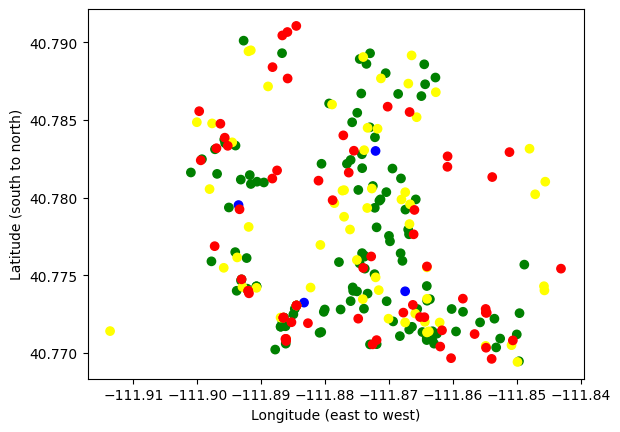

In [245]:
location_df = df[["Latitude", "Longitude", "SoldPrice"]].sort_values(by=["SoldPrice"])

# The following color choices are based on SoldPrice percentiles found with location_df.describe()
def determine_color(val):
    if val < 210_750:
        return "blue"
    if val < 403_000:
        return "green"
    if val < 570_000:
        return "yellow"
    if val < 1_000_000:
        return "red"

colors = location_df["SoldPrice"].apply(determine_color)
plt.scatter(df.Longitude, df.Latitude, c=colors)
plt.xlabel("Longitude (east to west)")
plt.ylabel("Latitude (south to north)")

Within the locations given, there does not seem to be a large impact on housing prices.
Some of the more expensive homes (red or yellow) are mixed in with some of the cheapest homes (blue or green).
There are some clusters of expensive homes in the northwest, but they are small clusters and in close proximity to other clusters of cheaper homes.

#### Task 5: Simple Linear Regression

In [246]:
import statsmodels.formula.api as sm

sold_list_ols = sm.ols(formula="SoldPrice ~ LstPrice", data=df).fit()
sold_list_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.401e+04
Date:                Fri, 30 May 2025   Prob (F-statistic):          1.31e-249
Time:                        09:33:55   Log-Likelihood:                -2828.2
No. Observations:                 251   AIC:                             5660.
Df Residuals:                     249   BIC:                             5667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.247e+04   3100.735      4.022      0.000    6364.331    1.86e+04
LstPrice       0.9459      0.006    154.948      0.000       0.934       0.958
==============================================================================
Omnibus:                      122.533   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              877.178
Skew:                          -1.803   Prob(JB):                    3.34e-191
Kurtosis:                      11.418   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Simple regression analysis

* The R squared for SoldPrice and LstPrice is 0.990 which means LstPrice is a strong predictor of the SoldPrice (i.e. the LstPrice's variance can describe the variance of SoldPrice)
* $β_1$ ~= 0.95 which means for every dollar of LstPrice the SoldPrice will increase 0.95 cents

Text(0, 0.5, 'Sold Price')

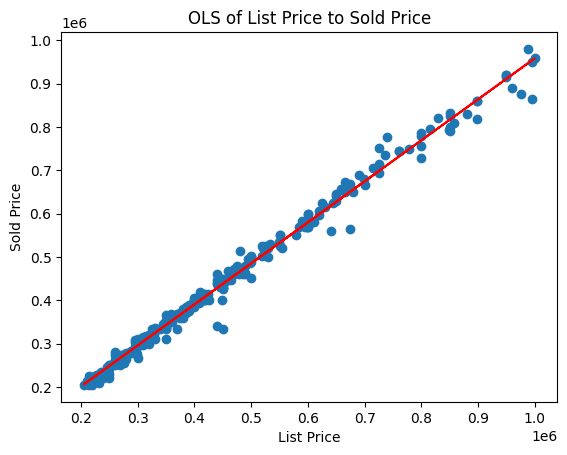

In [247]:
plt.scatter(df["LstPrice"], df["SoldPrice"])
plt.plot(df["LstPrice"], sold_list_ols.predict(), color="red")

plt.title("OLS of List Price to Sold Price")
plt.xlabel("List Price")
plt.ylabel("Sold Price")

#### Task 6: Multilinear Repression

In [248]:
independent_vars = " + ".join(['Acres',
                'GaragCap',
                'Taxes',
                'TotBed',
                'TotBth',
                'TotSqf',
                'Latitude',
                'Longitude'
                ])

sold_multi = sm.ols(formula=f"SoldPrice ~ {independent_vars}", data=df).fit()
sold_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     161.9
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.29e-92
Time:                        09:33:55   Log-Likelihood:                -3170.8
No. Observations:                 251   AIC:                             6360.
Df Residuals:                     242   BIC:                             6391.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.234e+08   5.03e+07      2.455      0.015    2.44e+07    2.22e+08
Acres       8.729e+04   6.82e+04      1.280      0.202   -4.71e+04    2.22e+05
GaragCap    2.016e+04   6648.520      3.032      0.003    7060.188    3.33e+04
Taxes         46.9572      5.928      7.921      0.000      35.280      58.635
TotBed      1.034e+04   5985.503      1.728      0.085   -1448.847    2.21e+04
TotBth      5720.6936   8174.998      0.700      0.485   -1.04e+04    2.18e+04
TotSqf        44.8185      9.595      4.671      0.000      25.918      63.719
Latitude    1.384e+06   1.16e+06      1.194      0.234   -8.99e+05    3.67e+06
Longitude   1.606e+06   4.36e+05      3.682      0.000    7.47e+05    2.47e+06
==============================================================================
Omnibus:                       25.199   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.749
Skew:                           0.628   Prob(JB):                     6.35e-09
Kurtosis:                       4.425   Cond. No.                     4.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### task 6 questions

* The best predictors for sold price are Taxes, TotSqf, and Longitude. Each of these has the smallest P>|t| meaning they have a very high likelihood that they are strong predictors of the sold price.
* The TotSqf is measuring the price per square foot. For every square foot added the sold price will increase ~$45 thus giving us roughly $45/square foot.
* Each garage space adds about $17,430 to the sold price of a house.
* It appears Longitude has an effect and Latitude does not. Latitude shows P>|t| = 0.234, meaning there is a 23.4% chance that Latitude can support the null hypothesis and have no effect on Sold Price. Whereas Longitude's P>|t| = 0.000 supports that it is a statistically significant predictor of sold price.
* Below is the same OLS model, but with LstPrice as the dependent variable. The R-Squared for the SoldPrice and LstPrice models are 0.843 and 0.857 respectively. So, it appears we need to refine the model/data further to get the sold price model to outperform the lst price model. However, the models are very close.

In [249]:
sold_multi = sm.ols(formula=f"LstPrice ~ {independent_vars}", data=df).fit()
sold_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LstPrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     181.0
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.43e-97
Time:                        09:33:55   Log-Likelihood:                -3171.6
No. Observations:                 251   AIC:                             6361.
Df Residuals:                     242   BIC:                             6393.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.415e+08   5.04e+07      2.807      0.005    4.22e+07    2.41e+08
Acres       1.167e+05   6.84e+04      1.706      0.089   -1.81e+04    2.52e+05
GaragCap    2.292e+04   6669.133      3.437      0.001    9782.062    3.61e+04
Taxes         46.8115      5.947      7.872      0.000      35.098      58.525
TotBed      9600.5365   6004.060      1.599      0.111   -2226.352    2.14e+04
TotBth      8614.7690   8200.344      1.051      0.295   -7538.393    2.48e+04
TotSqf        49.7401      9.625      5.168      0.000      30.781      68.699
Latitude    8.671e+05   1.16e+06      0.746      0.457   -1.42e+06    3.16e+06
Longitude    1.58e+06   4.38e+05      3.611      0.000    7.18e+05    2.44e+06
==============================================================================
Omnibus:                       36.491   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.640
Skew:                           0.739   Prob(JB):                     1.02e-16
Kurtosis:                       5.204   Cond. No.                     4.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Task 7: Incorporating a categorical variable

After adding square footage, the perceived reduction in predictive power for property type is likely due to total square footage being collinear with property type.
The property types are highly correlated with square footage as typically an apartment is smaller than a town home which is smaller than a single family home, thus these features are correlated.
When the regression model is being fit, it's difficult to state the level of impact each feature (square footage or property type) has on the sold price as both features has similar variance, and we cannot state which feature contributed to the sold price more.
This can result in the feature's coefficients being reduced, and its error increasing; both of these lead to the user perceiving them as being weak predictive features whereas they might be strong predictors when used on their own.

This collinearity can be seen in the plot below. As the square footage increases, we seen the typical home type changes from condo -> townhouse -> single family.

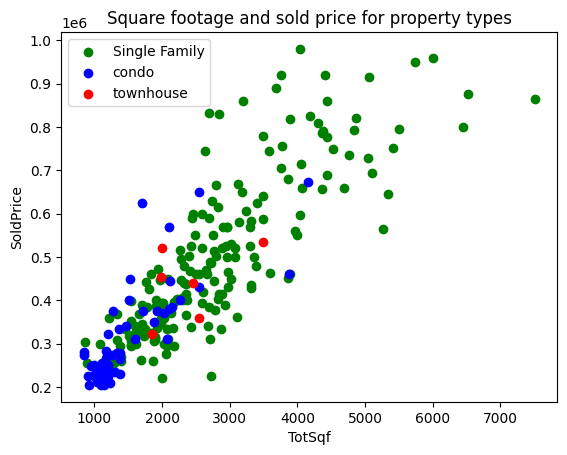

In [265]:
task_7_df = df[['TotSqf', 'SoldPrice', 'PropType']]

single_family_df = df[df['PropType'] == 'Single Family']
condo = df[df['PropType'] == 'Condo']
townhouse = df[df['PropType'] == 'Townhouse']

plt.scatter(single_family_df["TotSqf"], single_family_df["SoldPrice"], color="green", label="Single Family")
plt.scatter(condo["TotSqf"], condo["SoldPrice"], color="blue", label="condo")
plt.scatter(townhouse["TotSqf"], townhouse["SoldPrice"], color="red", label="townhouse")
plt.xlabel("TotSqf")
plt.ylabel("SoldPrice")
plt.title("Square footage and sold price for property types")
plt.legend()